In [47]:
import pandas as pd

In [48]:
# Data injestion step
df = pd.read_csv('data/gemstone-1.csv')

In [49]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31594 entries, 0 to 31593
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       31594 non-null  int64  
 1   carat    31594 non-null  float64
 2   cut      31594 non-null  object 
 3   color    31594 non-null  object 
 4   clarity  31594 non-null  object 
 5   depth    31594 non-null  float64
 6   table    31594 non-null  float64
 7   x        31594 non-null  float64
 8   y        31594 non-null  float64
 9   z        31594 non-null  float64
 10  price    31594 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.7+ MB


In [51]:

df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [52]:
# no missing value present in dataset

In [53]:
df.duplicated().sum()

0

In [54]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']

In [55]:
print(numerical_columns)
print(categorical_columns)

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [56]:
df[categorical_columns].describe()

,cut,color,clarity
count,31594,31594,31594
unique,5,7,8
top,Ideal,G,SI1
freq,15143,7270,8645


In [57]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [58]:
df['cut'].value_counts()

cut
Ideal        15143
Premium       8179
Very Good     6048
Good          1885
Fair           339
Name: count, dtype: int64

In [59]:
df['color'].value_counts()

color
G    7270
E    5746
F    5644
H    4989
D    4043
I    2890
J    1012
Name: count, dtype: int64

In [60]:
df['clarity'].value_counts()

clarity
SI1     8645
VS2     7872
VS1     4980
SI2     4954
VVS2    2593
VVS1    1754
IF       706
I1        90
Name: count, dtype: int64

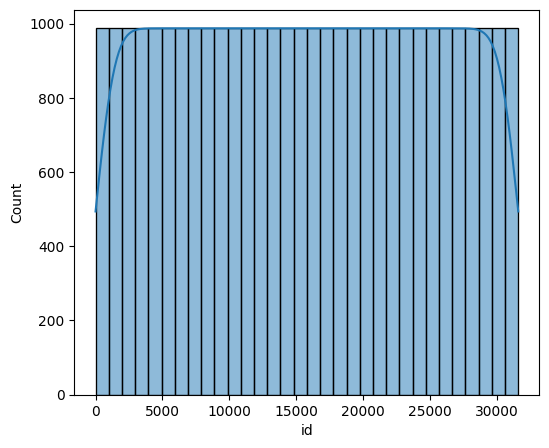

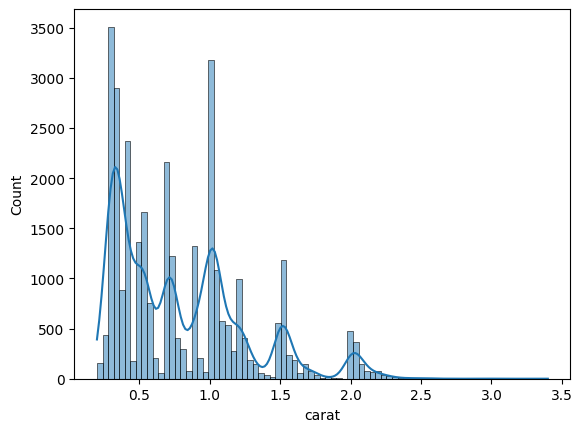

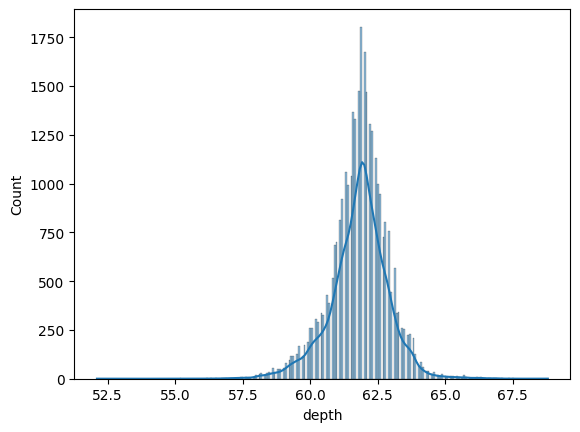

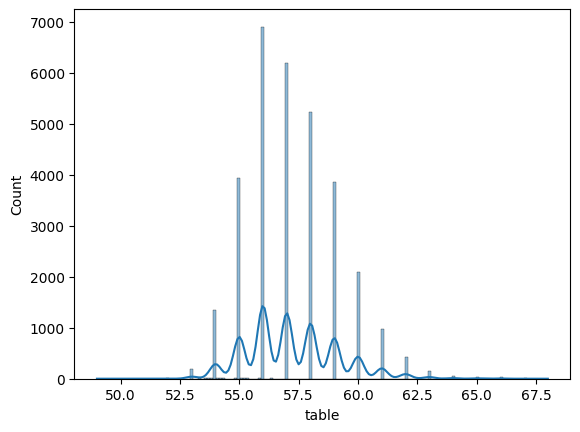

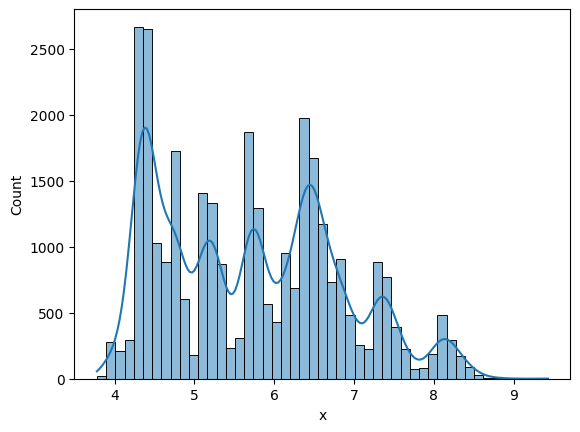

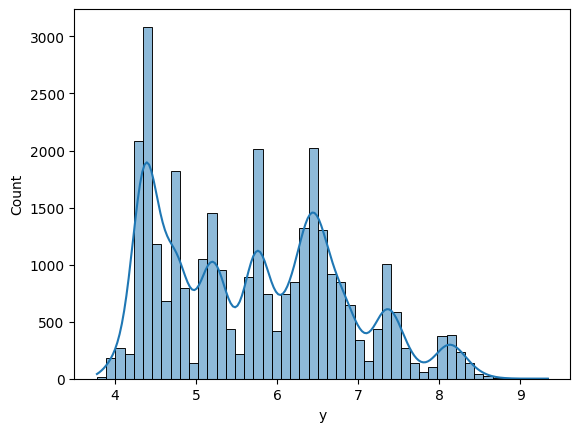

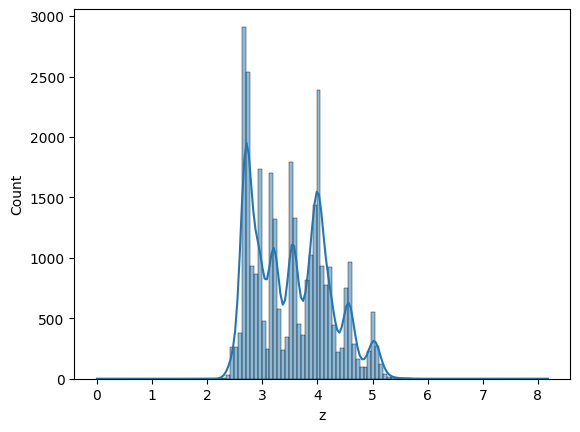

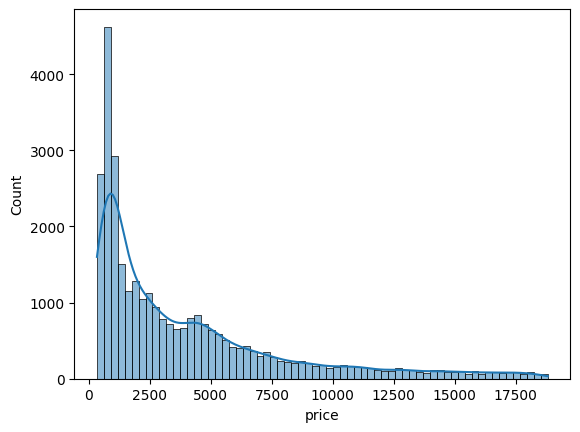

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i,kde = True)
    print()
    plt.show()

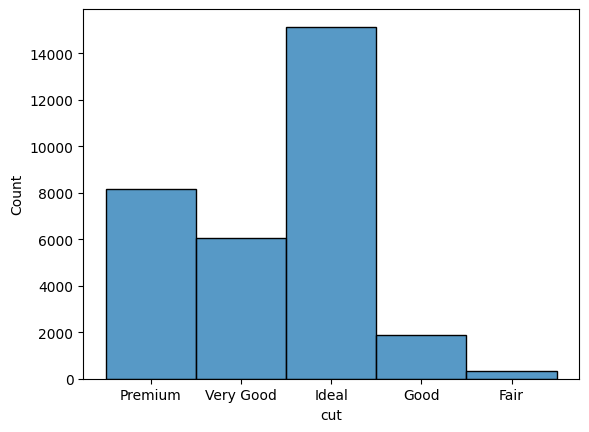

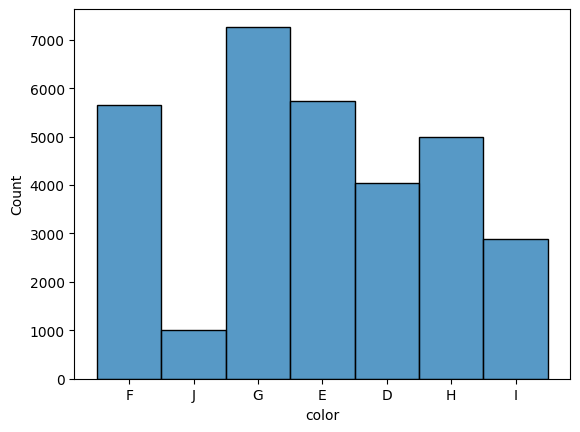

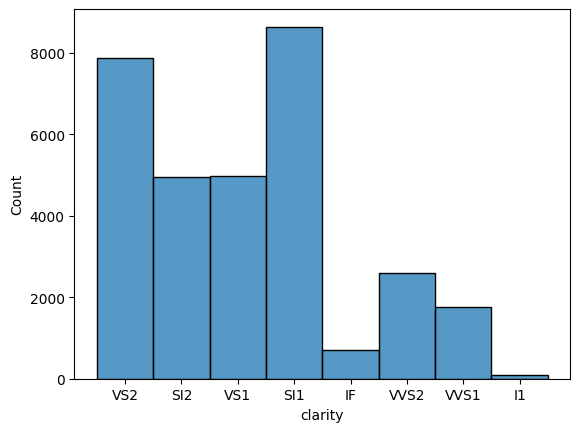

In [62]:
x= 1
for i in categorical_columns:

    sns.histplot(data = df, x= i,kde = False)
    print()
    plt.show()


<Axes: >

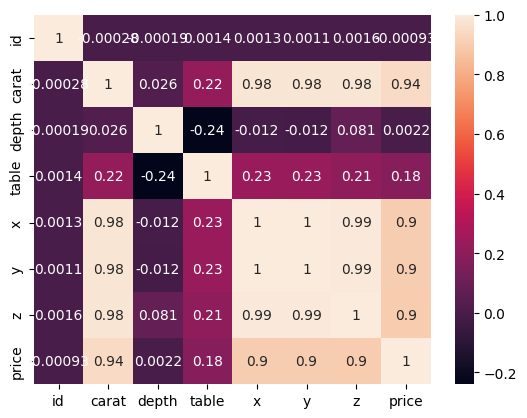

In [63]:
# correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [64]:
# sns.pairplot(df)

In [65]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [66]:
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [67]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [68]:
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [69]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [70]:
color_map = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [71]:
df['color']=df['color'].map(color_map)
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)

In [72]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
